## This Notebook shows my solution to task 1 from the application to the 2020 qosf mentoring

In [21]:
from IPython.display import Image

# The task reads:
Implement, on a quantum simulator of your choice, the following 4 qubits state |$\psi$($\theta$)>:
![title](img/Imagen1.png)
Where the number of layers, denoted with L, has to be considered as a parameter. We call ¨Layer¨ the combination of 1 yellow + 1 green block, so, for example, U1 + U2 is a layer. The odd/even variational blocks are given by:


Even blocks
![title](img/Imagen2.png)


Odd blocks
![title](img/Imagen3.png)

The angles $\theta_{i,n}$, are variational parameters, lying in the interval (0, 2$\pi$), initialized at random. Double qubit gates are CZ gates.

Report with a plot, as a function of the number of layers, L, the minimum distance

$\epsilon$= $\min_\theta$ || |$\psi$($\theta$)> - |$\varphi$> ||

Where |$\varphi$> is a randomly generated vector on 4 qubits and the norm || | $\nu$> ||, of a state | $\nu$>, simply denotes the square root of the sum of the modulus square of the components of |$\nu$ >. The right set of parameters $\theta_{i,n}$ can be found via any method of choice (e.g. grid-search or gradient descent)

Bonus question:
Try using other gates for the parametrized gates and see what happens.

# Solution

In [2]:
# Import all the necessary libraries and erase the warnings that come up
import warnings
warnings.filterwarnings('ignore')
from qiskit import *
import numpy as np
from numpy import random as rd
from numpy import pi
import cmath
import matplotlib.pyplot as plt

# Definition of the different functions needed

In [3]:
# Function to create an odd block as a function of i (the block number)
def oddBlock(i,Angles):
    oqc=QuantumCircuit(4)
    oqc.rx(Angles[i-1],[0,1,2,3]) # For the bonus this is where the rx gate can be changed
    return oqc

In [4]:
# Function to create an even block as a function of i (the block number)
def evenBlock(i,Angles):
    eqc=QuantumCircuit(4)
    eqc.rz(Angles[i-1],[0,1,2,3]) # For the bonus this is where the rz gate can be changed
    for ind in range(3):
        eqc.cz(0,ind+1)
    for ind in range(2):
        eqc.cz(1,ind+2)
    eqc.cz(2,3)
    return eqc

In [5]:
# Function to compose the circuit with all the necessary layers
def circBuilder(qcc,L,Angles):
    for ind in range(L):
        oqc=oddBlock(2*ind+1,Angles)     # Create odd block
        eqc=evenBlock(2*ind+2,Angles)    # Create even block
        qcc=qcc.compose(oqc)
        qcc=qcc.compose(eqc)
    return qcc

In [6]:
# Function to calculate the norm of a vector
def norm(vect):
    nrm=np.sqrt(sum(abs(vect)**2))
    return nrm

In [7]:
# Function to define the random sets of angles for grid search
def rand_angle_set(L,S):
    # S: size of the grid
    Angle_Sets=[[] for ind in range(S)]
    for ind in range(S):
        Angle_Sets[ind]=rd.random(L*2)*2*pi # Vector containing a random set of angles
    return Angle_Sets

In [8]:
# Function to implement the grid search 
# Returns the minimum norm of the difference between psi and phi for each angle set
def grid_search(Angle_Sets,L,backend,Shots):
    norms=[]
    
    for ind in range(len(Angle_Sets)):
        
        # Building of the circuit
        qc=QuantumCircuit(4)          # Create a 4 qubit quantum circuit with each qubit initialized at 0
        qc=circBuilder(qc,L,Angle_Sets[ind])          # Compose the circuit
        if ind==0:
            qc.draw(output = 'mpl')       # Draw the circuit just the first time
        
        # Getting the statevector (psi)    
        job = execute(qc, backend, shots =Shots)
        psi = job.result().get_statevector(qc)
        #print(psi)
        
        # Getting the norm
        new_norm=norm(psi-phi)
        norms.append(new_norm)
    
    min_norm=min(norms)
    
    return min_norm

# Define random vector, constants and simulation parameters

In [10]:
# Randomly generated vector on 4 qubits
rs=quantum_info.random_statevector(2**4)
phi=rs.data
print(phi)

[-0.16751263+0.06077054j -0.30022062-0.17344471j -0.22221798+0.05365751j
  0.28910018-0.03256682j  0.17612473-0.08755541j -0.07514098-0.12216184j
 -0.02869308+0.12641282j  0.35339876+0.00424106j  0.06007078+0.09842448j
 -0.08704557-0.04219115j -0.16411208+0.21354916j -0.17334097-0.2632974j
  0.15330558+0.38055971j  0.14811474+0.16262662j  0.08651063+0.19670866j
 -0.07131261-0.21823082j]


In [19]:
# We define the constants
S=100 # Size of the grid for grid search

In [12]:
# Define simulation parameters
backend = Aer.get_backend('statevector_simulator')
shots=1000

In [29]:
# Define the set of layers to simulate
layers_set=[*range(1,31)] # Here we simulate the result ranging from 1 layer through to 30

# Graphing the minimum distance as a function of L

In [42]:
# Cycle for doing grid search for each number of layers

min_norms=[]

for L in layers_set:
    Angle_Sets=rand_angle_set(L,S)
    min_norm=grid_search(Angle_Sets,L,backend,shots)
    min_norms.append(min_norm)

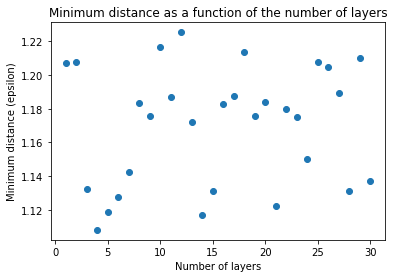

In [43]:
# Graph of the minimum distance as a function of L

#%matplotlib inline
plt.scatter(layers_set, min_norms)
plt.xlabel('Number of layers')
plt.ylabel('Minimum distance (epsilon)')
plt.title('Minimum distance as a function of the number of layers')
plt.savefig('MinDist2.png',facecolor=(1,1,1,1))

# Conclusion

There doesn't seem to be a relationship between the number of layers and the minimum distance. This means that our capacity for optimization is independent of the depth of the circuit. This may be due to several reasons. On one hand the optimization process is purely stochastic. On the other hand we may not see a relationship for the range of L chosen.